<a href="https://colab.research.google.com/github/etgcrog/rede-nerural/blob/master/carregando_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [124]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [125]:
#connectando ao driver
from google.colab import drive
drive.mount('/content/gdriver')

Drive already mounted at /content/gdriver; to attempt to forcibly remount, call drive.mount("/content/gdriver", force_remount=True).


In [126]:
img = cv2.imread("/content/gdriver/MyDrive/Colab Notebooks/data_emotion/testes/teste01.png")

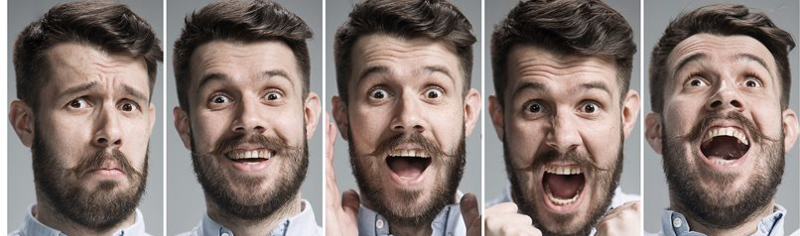

In [127]:
cv2_imshow(img)

In [128]:
path_cascade = "/content/gdriver/MyDrive/Colab Notebooks/data_emotion/haarcascade_frontalface_default.xml"
path_model = "/content/gdriver/MyDrive/Colab Notebooks/data_emotion/modelo_01_expressoes.h5"

In [129]:
face_detector = cv2.CascadeClassifier(path_cascade)
emotion_detector = load_model(path_model, compile=False)
labels = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

In [130]:
origin = img.copy()

faces = face_detector.detectMultiScale(origin,
                                       scaleFactor = 1.1,
                                       minNeighbors = 3,
                                       minSize = (20, 20))
# y_pos = faces[0][0]
# x_pos = faces[0][1]

# len_y = faces[0][2]
# len_x = faces[0][3]

In [148]:
faces

array([[660,  29, 129, 129],
       [171,  33, 158, 158],
       [328,  27, 163, 163],
       [ 32,  45, 147, 147],
       [482,  44, 163, 163]], dtype=int32)

In [151]:
for i in range(len(faces)):
  y_pos = faces[i][0]
  x_pos = faces[i][1]
  len_y = faces[i][2]
  len_x = faces[i][3]

  print(f"Img 1:\n {y_pos}, {x_pos}, {len_y}, {len_x}")

  face_img = faces[i]
  # [y_pos:y_pos+len_y, x_pos:x_pos+len_x]

  cv2_imshow(face_img)
  break
  gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

#   #Entraindo area de interesse
#   roi = gray[x_pos:x_pos + len_x, y_pos:y_pos + len_y]
#   #Reduzindo a dimensionalidade da imagem 2x2
#   roi = cv2.resize(roi, (48, 48))

# #normalizacao de uint8 para float
#   roi = roi.astype('float')
#   #Escala entre 0 e 1
#   roi = roi / 255

#   roi = img_to_array(roi)
#   roi = np.expand_dims(roi, axis=0)

#   pred = emotion_detector.predict(roi)[0]
#   print(pred)

#   label = labels[np.argmax(pred)]

#   cv2.putText(face, label, (y_pos, x_pos - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2, cv2.LINE_AA)
#   cv2.rectangle(face, (y_pos, x_pos), (y_pos + len_y, x_pos + len_x), (255,0,0), 2)
#   cv2_imshow(face)

Img 1:
 660, 29, 129, 129
